## 1. Architecture of a simple neural network

An artificial neural network is loosely inspired by the way the human brain functions. Technically, it is an improvement over linear and logistic regression as neural networks introduce multiple non-linear measures in estimating the output. The more complex the function, the greater the chance that the network has to tune to the data that is given as input, hence the better the accuracy of the predictions.

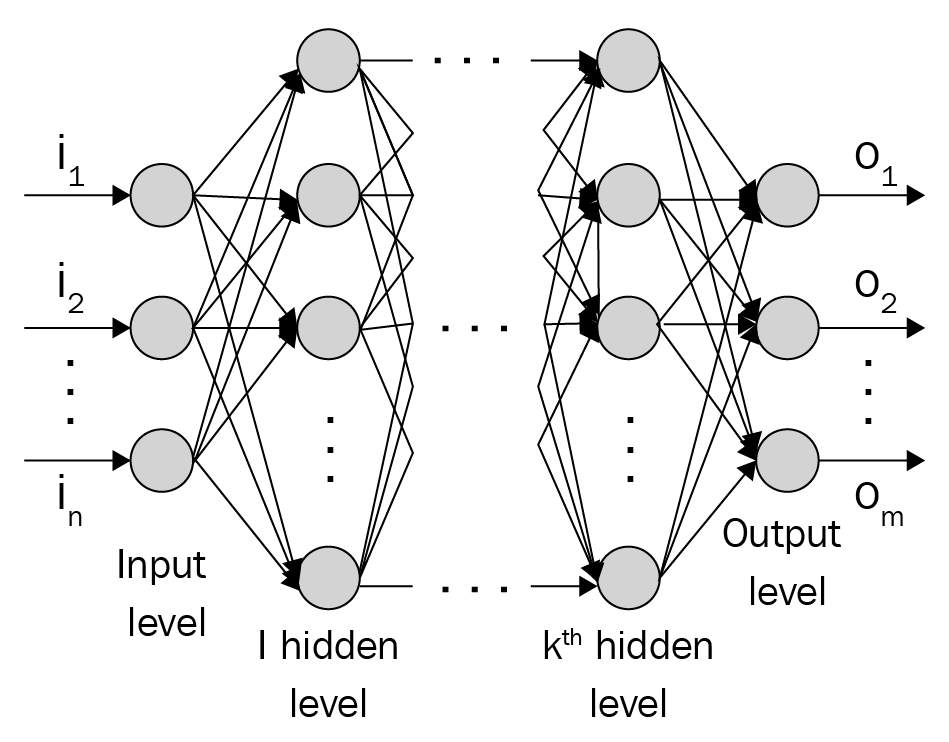

A layer is a collection of one or more nodes (computation units), where each node in a layer is connected to every other node in the next immediate layer. The input level/layer is constituted of the input variables that are required to predict the output values.

The number of nodes in the output layer depends on whether we are trying to predict a continuous variable or a categorical variable. If the output is a continuous variable, the output has one unit.

If the output is categorical with $n$ possible classes, there will be $n$ nodes in the output layer. The hidden level/layer is used to transform the input layer values into values in a higher-dimensional space, so that we can learn more features from the input. The hidden layer transforms the output as follows:

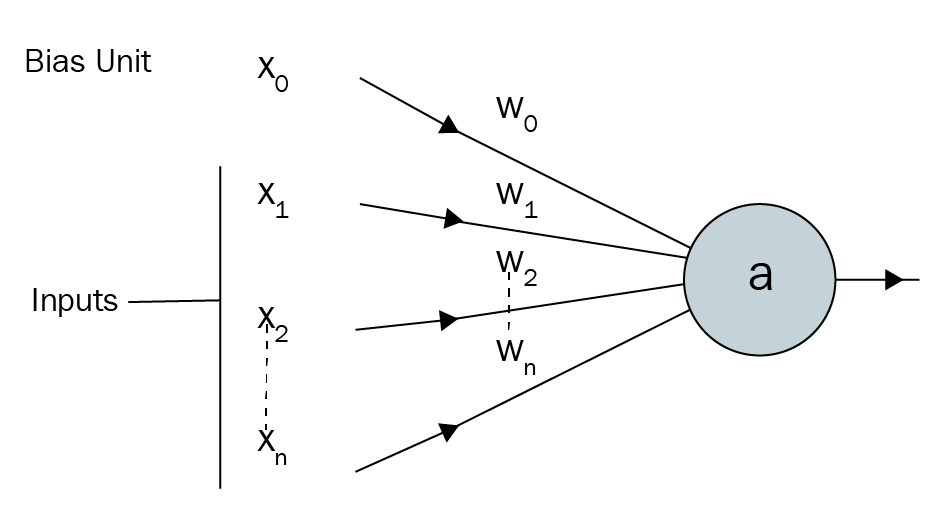

In the preceding diagram, $x_1,x_2,\ldots, x_n$ are the independent variables, and $x_0$ is the bias term (similar to the way we have bias in linear/logistic regression).

Note that $w_1,w_2,\ldots, w_n$ are the weights given to each of the input variables. If $a$ is one of the units in the hidden layer, it will be equal to the following:

$$a=f(\sum_{i=1}^Nw_ix_i) $$

The $f$ function is the activation function that is used to apply non-linearity on top of the sum-product of the input and their corresponding weight values.

$\big(\frac{1}{1+e^{-w^T x}})$


## 2. Training a Neural Network

Training a neural network basically means calibrating all of the weights in a neural network by repeating two key steps: forward-propagation and back-propagation.

### Calculating the hidden layer unit values

We assign weights to all of the connections. Note that these weights are selected randomly (based on Gaussian distribution) since it is the first time we're forward-propagating. In this specific case, let's start with initial weights that are between 0 and 1.

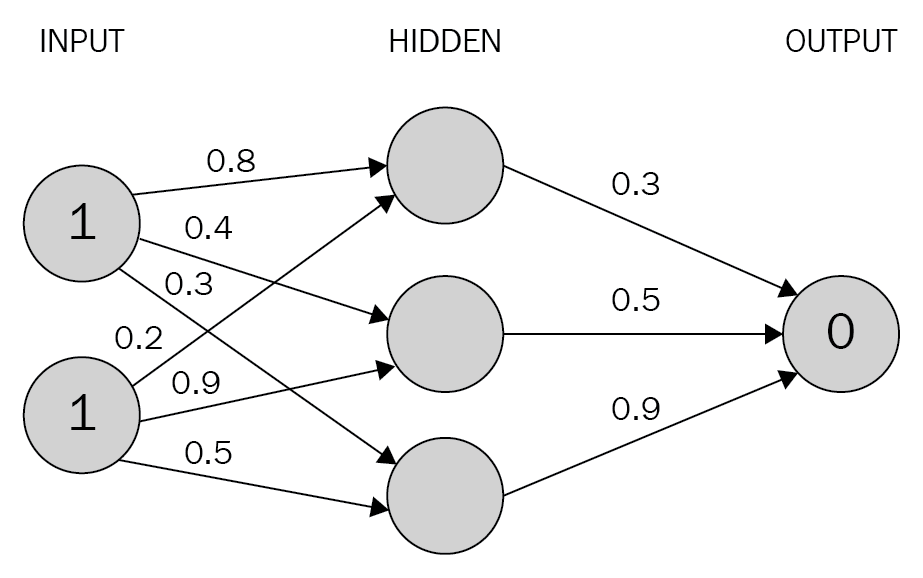

In the next step, we perform the multiplication of the input with weights to calculate the values of hidden units in the hidden layer:

$h_1=1 \cdot 0.8+ 1\cdot 0.2 = 1$

$h_2=1 \cdot 0.4+ 1\cdot 0.9 = 1.3$

$h_3=1 \cdot 0.3+ 1\cdot 0.5 = 0.8$

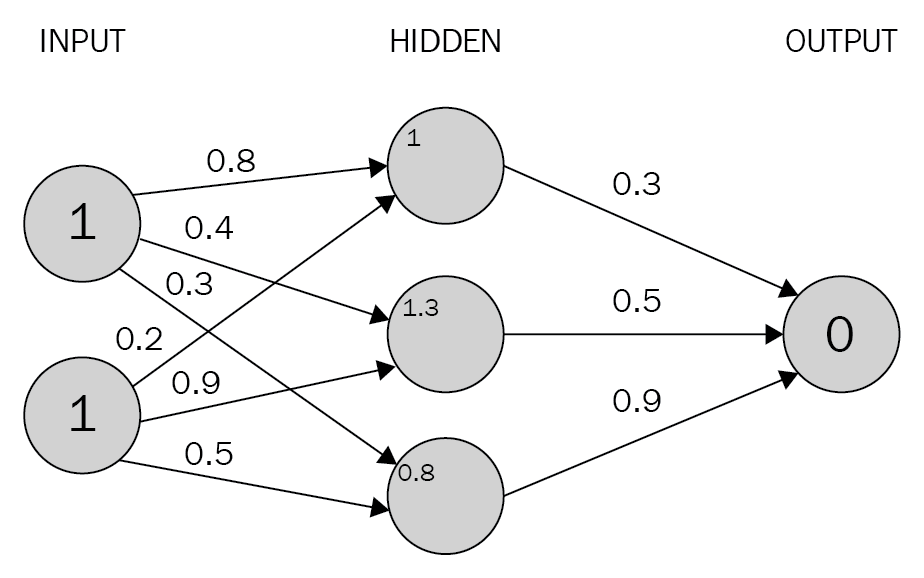

Note that in the preceding output we calculated the hidden values. For simplicity, we excluded the bias terms that need to be added at each unit of a hidden layer.

Now, we will pass the hidden layer values through an activation function so that we attain non-linearity in our output.

### Applying the activation function

Activation functions are applied at multiple layers of a network. They are used so that we achieve high non-linearity in input, which can be useful in modeling complex relations between the input and output.

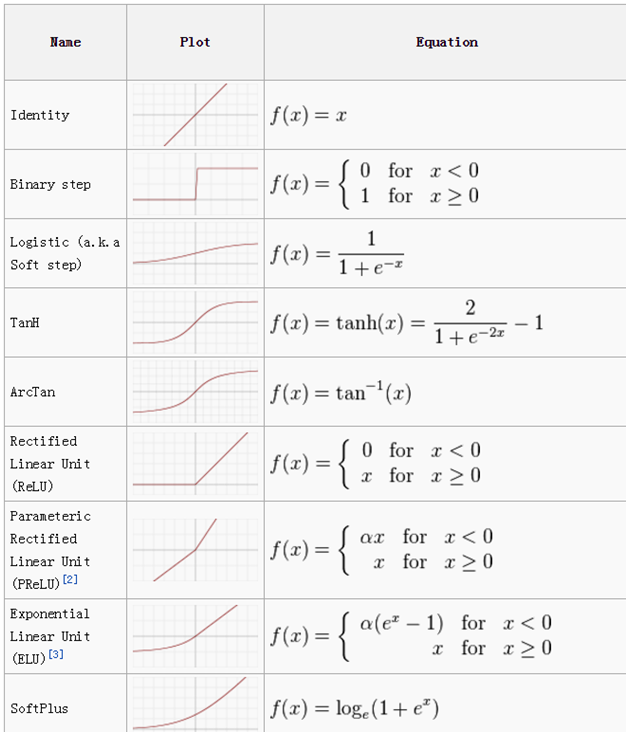

For our example, let’s use the sigmoid function for activation. The sigmoid function looks like this, graphically:
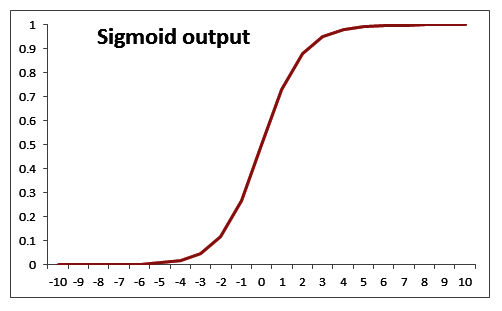

By applying sigmoid activation, $S(x)$, to the three hidden-layer sums, we get the following:

$S(h_1) = S(1.0) = 0.73$

$S(h_2) = S(1.3) = 0.78$

$S(h_3) = S(0.8) = 0.69$

### Calculating the output layered values

Using the hidden layer values and the weight values, we will calculate the output values:
$0.73 \cdot 0.3 + 0.79 \cdot 0.5 + 0.69 \cdot 0.9 = 1.235$

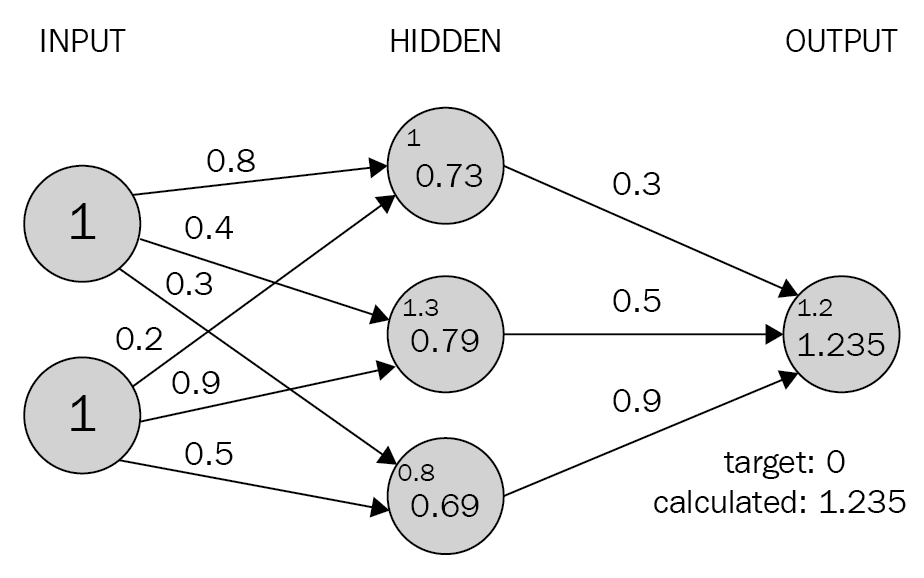

In [ ]:
Loss1=(0-1.235)**2
0.3+0.001
Loss2(0-newvalue)**2
if Loss2<Loss1

Datasize=5000
Batch size=1000
epoch=500

(5000/1000)*500

$\sum_{i=1}^N(Loss_i)^2$

Because we started with a random set of weights, the value of the output neuron is very different from the target, in this case by $+1.235$ (since the target is $0$).

### Calculating loss during continuous variable prediction

Typically, when the variable is a continuous one, the loss value is calculated as the squared error, that is, we try to minimize the mean squared error by varying the weight values associated with the neural network:

$$J=\frac{1}{m}\sum_{i=1}^m (\hat{y}_i-y_i)^2$$

### Calculating loss during categorical variable prediction

When the variable to predict is a discrete one (that is, there are only a few categories in the variable), we typically use a categorical cross-entropy loss function. 
$$J=-\sum_{i=1}^m\big(\sum_{j=1}^c(p_{ic}\log(p_{ic})\big)$$

## Building NN from Scratch

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from copy import deepcopy

In [3]:

x = np.array([[1],[2],[3],[4]])
y = np.array([[2],[4],[6],[8]])

In [4]:
print(x)

[[1]
 [2]
 [3]
 [4]]


In [5]:
model = Sequential()
model.add(Dense(3, activation='relu', input_shape=(1,)))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 6         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [6]:

from keras.optimizers import sgd
s = sgd(lr = 0.01)
model.compile(optimizer=s,loss='mean_squared_error',metrics=['accuracy'])

display(model.weights)

[<tf.Variable 'dense_1/kernel:0' shape=(1, 3) dtype=float32>,
 <tf.Variable 'dense_1/bias:0' shape=(3,) dtype=float32>,
 <tf.Variable 'dense_2/kernel:0' shape=(3, 1) dtype=float32>,
 <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32>]

In [8]:
def feed_forward(inputs, outputs, weights):
    pre_hidden = np.dot(inputs,weights[0])+ weights[1]
    hidden = np.where(pre_hidden<0, 0, pre_hidden) 
    out = np.dot(hidden, weights[2]) + weights[3]
    squared_error = (np.square(out - outputs))
    return squared_error

In [28]:
def update_weights(inputs, outputs, weights, epochs):  
    for epoch in range(epochs):
        org_loss = feed_forward(inputs, outputs, weights)

        weights_new = deepcopy(weights)
        weights_new2 = deepcopy(weights)

        for i, layer in enumerate(reversed(weights)):
            #print(i, layer)
            for index, weight in np.ndenumerate(layer):
                #print(index, weight)
                weights_new[-(i+1)][index] += 0.0001
                #print('weights_new:', weights_new)
                loss = feed_forward(inputs, outputs, weights_new)
                #print('loss', loss)
                del_loss = np.sum(org_loss - loss)/(0.0001*len(inputs))

                weights_new2[-(i+1)][index] += del_loss*0.01
                #print('weights_new2:', weights_new2)
                weights_new = deepcopy(weights)

        weights = deepcopy(weights_new2)
        
    return weights_new2



In [29]:
w = deepcopy(model.get_weights())
print(w)

[array([[ 0.17639482, -0.47015727, -0.17779887]], dtype=float32), array([0., 0., 0.], dtype=float32), array([[ 0.8914925 ],
       [ 0.34068334],
       [-0.24449939]], dtype=float32), array([0.], dtype=float32)]


In [30]:
print(x)

[[1]
 [2]
 [3]
 [4]]


In [12]:
print(y)

[[2]
 [4]
 [6]
 [8]]


In [15]:
w[0]

array([[ 0.17639482, -0.47015727, -0.17779887]], dtype=float32)

In [16]:
w[0][0]

array([ 0.17639482, -0.47015727, -0.17779887], dtype=float32)

In [17]:
np.dot(x,w[0])

array([[ 0.17639482, -0.47015727, -0.17779887],
       [ 0.35278964, -0.94031453, -0.35559773],
       [ 0.52918446, -1.4104718 , -0.5333966 ],
       [ 0.70557928, -1.88062906, -0.71119547]])

In [18]:
pre_hidden = np.dot(x,w[0])+ w[1]
print(pre_hidden)

[[ 0.17639482 -0.47015727 -0.17779887]
 [ 0.35278964 -0.94031453 -0.35559773]
 [ 0.52918446 -1.4104718  -0.5333966 ]
 [ 0.70557928 -1.88062906 -0.71119547]]


In [19]:
hidden = np.where(pre_hidden<0, 0, pre_hidden) 
print(hidden)
    

[[0.17639482 0.         0.        ]
 [0.35278964 0.         0.        ]
 [0.52918446 0.         0.        ]
 [0.70557928 0.         0.        ]]


In [20]:
out = np.dot(hidden, w[2]) + w[3]
print(out)

[[0.15725466]
 [0.31450931]
 [0.47176397]
 [0.62901863]]


In [33]:
weights_new=update_weights(x,y,w,100);
print(weights_new)

[array([[ 1.2651774 , -0.47015727, -0.17779887]], dtype=float32), array([0.10827655, 0.        , 0.        ], dtype=float32), array([[ 1.4923218 ],
       [ 0.34068334],
       [-0.24449939]], dtype=float32), array([0.16770943], dtype=float32)]


In [ ]:
model.fit(x, y, epochs=100, batch_size=4, verbose=1)
model.get_weights()

In [34]:
x1 = [[5],[6]]
model.predict(np.array(x1))

array([[ 9.770149],
       [11.658396]], dtype=float32)

In [35]:
def cat_cross_entropy(p, y):
    return -np.sum((y*np.log2(p)+(1-y)*np.log2(1-p)))

In [36]:
cat_cross_entropy(np.array([0.1,0.9]),np.array([0,1]))

0.3040061868900999